In [773]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math

In [774]:
a = 5
sigma2 = 4  # Дисперсия
sigma = math.sqrt(sigma2)  # Среднеквадратичное отклонение
gamma = 0.93
alpha = 1 - gamma
n = 20
M = 1900

1. Смоделировать выборку из 20 независимых наблюдений над случайной величиной X,
имеющей нормальный закон распределения с параметрами (5,4).

In [775]:
norm_r=sts.norm.rvs(loc=a,scale=sigma, size=n)
print(norm_r)

[ 3.73117743  4.74577343  4.79906119  4.24515048  6.20295558  2.4695591
  7.74278297  4.04224647  5.1625439   4.06744208  2.25301362  3.05035352
  5.23220833  4.31185071 -0.49594941  4.83846643  5.71140691  8.55234136
  3.11160183  5.51534324]


1.1. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X известна.
*интервальные оценки найти двумя способами.
Первый способ заключается в программной реализации формул для вычисления границ
интервальной оценки, а второй — в использовании метода interval из модуля
статистических функций scipy.stats.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.93$$
$$
\Delta=\frac{t_\gamma\sigma}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [776]:
x_mean=np.mean(norm_r)
t_value = sts.norm.ppf(0.965)
del_=(t_value*sigma)/math.sqrt(n)
low_bound=x_mean-del_
up_bound=x_mean+del_
print(f"Доверительный интервал для a способ 1): [{low_bound};{up_bound}]")

interval = sts.norm.interval(gamma, loc=np.mean(norm_r), scale=sigma / np.sqrt(n))
print(f"Доверительный интервал (способ 2): [{interval[0]:.4f}, {interval[1]:.4f}]")

Доверительный интервал для a способ 1): [3.654155371078094;5.274777544629853]
Доверительный интервал (способ 2): [3.6542, 5.2748]


1.2. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
математического ожидания случайной величины X, предполагая, что дисперсия
случайной величины X неизвестна
$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.93$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
\Phi(t_\gamma)=\frac{\gamma}{2} $$

In [777]:
x_mean = np.mean(norm_r)

# 2. Вычисляем выборочную дисперсию S^2
S_2 = 0
for i in norm_r:
    S_2 += math.pow(i - x_mean, 2)
S_2 /= n - 1  

S = math.sqrt(S_2)

t_value = sts.t.ppf(1 - alpha / 2, df= n-1)  
print(t_value)

delta = t_value * S / np.sqrt(n)
lower_bound = x_mean - delta
upper_bound = x_mean + delta
print(f"Доверительный интервал для a при неизвестной дисперсии: [{lower_bound:.4f}; {upper_bound:.4f}]")

# 6. Способ с использованием scipy.stats.t.interval
interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=S / np.sqrt(n))
print(f"Доверительный интервал (способ 2): [{interval[0]:.4f}, {interval[1]:.4f}]")

1.9199915971807113
Доверительный интервал для a при неизвестной дисперсии: [3.6241; 5.3048]
Доверительный интервал (способ 2): [3.6241, 5.3048]


1.3. С надежностью 0.93 найти интервальную оценку (доверительный интервал) для
дисперсии случайной величины X.
$$
\left( \frac{(n - 1) S^2}{\chi^2_{\frac{\alpha}{2}, n-1}}, \frac{(n - 1) S^2}{\chi^2_{1 - \frac{\alpha}{2}, n-1}} \right)
$$

In [778]:
chi2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)

# 3. Вычисляем границы доверительного интервала для дисперсии
lower_bound = (n-1) * S_2 / chi2_upper
upper_bound = (n-1) * S_2 / chi2_lower

print(f"Доверительный интервал для дисперсии при надежности 0.93: ({lower_bound:.2f}; {upper_bound:.2f})")

Доверительный интервал для дисперсии при надежности 0.93: (2.31; 7.69)


2. Построить график зависимости длины доверительного интервала от надежности при
неизменном объеме выборки для случаев интервального оценивания математического
ожидания и дисперсии.

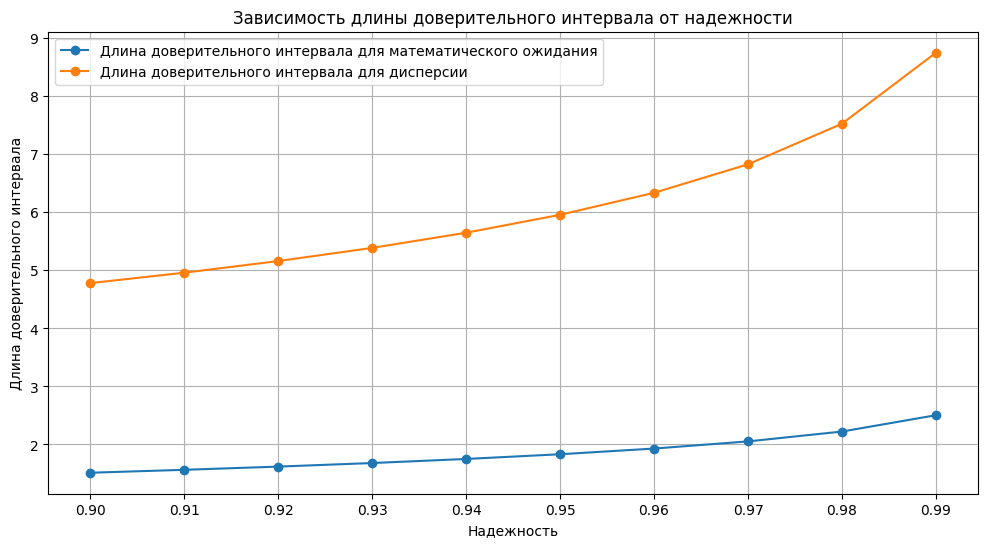

In [779]:
confidence_levels = np.linspace(0.90, 0.99, 10)  # от 90% до 99%

# Длины доверительных интервалов
len_mean = []
len_var = []

for confidence in confidence_levels:
    # 1. Доверительный интервал для математического ожидания
    alpha = 1 - confidence
    t_value = sts.t.ppf(1 - alpha / 2, df=n - 1) 
    len_interval = t_value * S / math.sqrt(n)
    length_mean = 2 * len_interval 
    len_mean.append( length_mean)

    # 2. Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
    length_variance = (n - 1) * S_2 / chi2_lower - (n - 1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(confidence_levels, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(confidence_levels, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(confidence_levels)
plt.show()

3. Построить график зависимости длины доверительного интервала от объема выборки при
неизменной надежности для случаев интервального оценивания математического
ожидания и дисперсии.
Пусть объем выборки изменяется от 10 до 50 с шагом 5

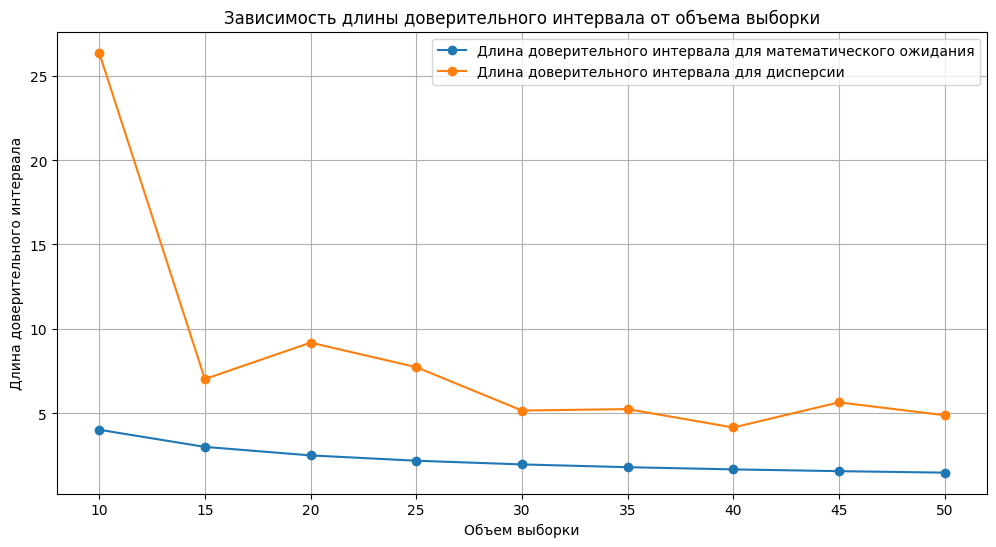

In [780]:
sample_size = list(range(10, 51, 5))
# Длины доверительных интервалов
len_mean = []
len_var = []

for size in sample_size:
    norm_r=sts.norm.rvs(loc=a, scale=sigma, size=size)
    x_mean = np.mean(norm_r)
    S_2 = 0
    for i in norm_r:
        S_2 += math.pow(i - x_mean, 2)
    S_2 /= size-1
    # Доверительный интервал для математического ожидания
    t_value = sts.t.ppf(1 - alpha / 2, df = size - 1) 
    len_interval = t_value * S / math.sqrt(size)
    len_mean.append(2 * len_interval)

    #  Доверительный интервал для дисперсии
    chi2_lower = sts.chi2.ppf(alpha / 2,  df = size - 1)
    chi2_upper = sts.chi2.ppf(1 - alpha / 2,  df = size - 1)
    length_variance = ( size-1) * S_2 / chi2_lower - ( size-1) * S_2 / chi2_upper
    len_var.append(length_variance)

# Построение графиков
plt.figure(figsize=(12, 6))
plt.plot(sample_size, len_mean, marker='o', label='Длина доверительного интервала для математического ожидания')
plt.plot(sample_size, len_var, marker='o', label='Длина доверительного интервала для дисперсии')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.xlabel('Объем выборки')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(sample_size)
plt.show()

4. Смоделировать 1900 выборок из 20 значений нормально распределенной случайной
величины X с параметрами (5,4). По каждой из 1900 выборок с надежностью 0,93 найти
интервальную оценку (доверительный интервал) для математического ожидания случайной
величины X, предполагая, что дисперсия случайной величины X неизвестна.

По результатам моделирования найти точечную оценку $\gamma$* надежности $\gamma$.

In [781]:
# %% 4. Моделирование M выборок и оценка надежности
count_gamma = 0

for _ in range(M):
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
    x_mean = np.mean(sample)
    S2 = np.var(sample, ddof=1)
    S = math.sqrt(S2)
    t_value = sts.t.ppf(1 - alpha / 2, df=n - 1)
    delta = t_value * S / math.sqrt(n)
    lower = x_mean - delta
    upper = x_mean + delta
    if lower <= a <= upper:
        count_gamma += 1

gamma_est = count_gamma / M
print(f"Оценка надежности: {gamma_est:.4f}")

Оценка надежности: 0.9879


5. Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (5,4).

In [782]:
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt

# %% [markdown]
# 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a=2, sigma^2=21).

# %%
M = 1900  # Число выборок
n = 20   # Размер выборки
a = 5     # Мат. ожидание
sigma = np.sqrt(4)  # Стандартное отклонение
samples = np.zeros((M, n))

for i in range(M):
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
    samples[i] = sample


5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)

$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [783]:
z_arr = []
for sample in samples:
    x_mean = np.mean(sample)
    s_2 = np.var(sample, ddof=1)  # Выборочная дисперсия
    s = np.sqrt(s_2)             # Выборочное стандартное отклонение
    z = np.sqrt(n) * (x_mean - a) / s
    z_arr.append(z)

5.2. По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.

In [784]:
z_mean=np.mean(z_arr)
z_var=np.var(z_arr)
z_median = np.median(z_arr)
std= np.std(z_arr) 
skewness = sts.skew(z_arr)        # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -0.01896
Медиана: -0.01181
Дисперсия: 1.135
Стандартное отклонение: 1.06538
Коэффициент ассиметрии: 0.00337
Эксцесс: 0.26667


5.3. Построить гистограмму относительных частот и теоретическую кривую распределения
случайной величины Z, а также ящичковую диаграмму.

In [785]:
std_z = np.std(z_arr)

# Формула Скотта: ширина бина
h_z = 3.5 * std_z / (M ** (1/3))

#полученные интервалы
bins = (np.arange(min(z_arr), max(z_arr) + h_z, h_z))
print(bins)

[-3.88448138 -3.58341909 -3.28235679 -2.98129449 -2.68023219 -2.3791699
 -2.0781076  -1.7770453  -1.475983   -1.17492071 -0.87385841 -0.57279611
 -0.27173381  0.02932848  0.33039078  0.63145308  0.93251538  1.23357767
  1.53463997  1.83570227  2.13676457  2.43782686  2.73888916  3.03995146
  3.34101376  3.64207605  3.94313835  4.24420065  4.54526295]


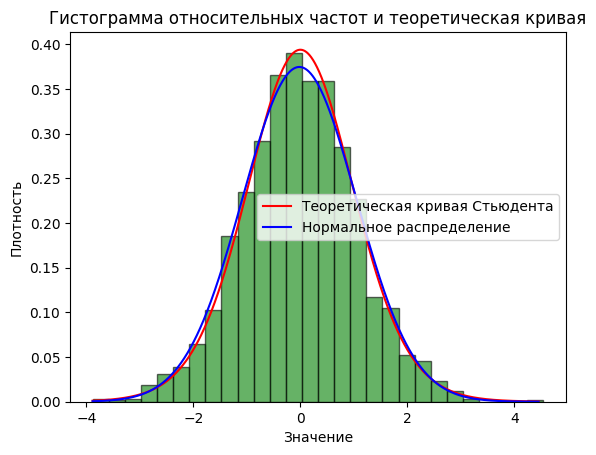

In [786]:
plt.hist(z_arr, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Гистограмма относительных частот')
plt.xlabel('Значение Z')
plt.ylabel('Плотность')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.t.pdf(x, n - 1)
plt.plot(x, pdf, 'r', label="Теоретическая кривая Стьюдента")

y = np.linspace(np.min(z_arr), np.max(z_arr), 1900)
pdf = sts.norm.pdf(y, np.mean(z_arr), np.std(z_arr))
plt.plot(y, pdf, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Показать график
plt.show()

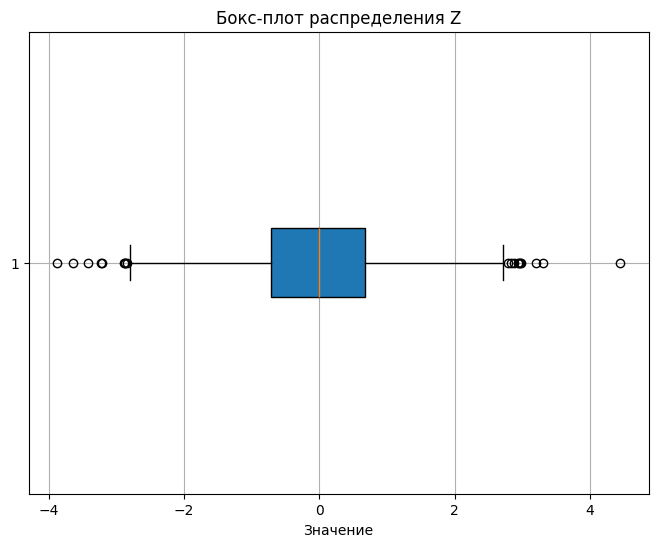

Фактическое количество выбросов: 19


In [787]:
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True)
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in z_arr:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")